### Scipy

We'll import our usual plotting and numpy packages, and also one more new one, `scipy`. Scipy has many subpackages with very useful functionality.  Highlights include:


<li>Integration and ODEs (scipy.integrate)
<li>Interpolation (scipy.interpolate)
<li>Input and output (scipy.io)
<li><b>Linear algebra</b> (scipy.linalg)
<li>Optimization and root finding (scipy.optimize)
<li><b>Signal processing</b> (scipy.signal)
<li>Sparse matrices (scipy.sparse)
<li><b>Statistical functions</b> (scipy.stats)


The common practice is to import these subpackages separately, with their own names.  We'll do that for optimize and linalg here. 

In [29]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them

import scipy.optimize as opt
import scipy.linalg as la

import pandas as pd

### Root finding.
We'll use the `brentq` method from `scipy.optimize` to find a function's roots:  that is, where it crosses zero.  This is an enhanced version of the most basic 'bisection' approach (adding interpolation), and likewise requires specifying an intial bracketing interval in which the root may lie.  

There are many other root finding methods in scipy:  see documentation for scipy.optimize (https://docs.scipy.org/doc/scipy/reference/optimize.html)

Let's test this out with a function with roots -1 and +1 

In [30]:
def f(x):
    return (x**2 - 1)

In [31]:
#search for root between left_bracket and right_bracket
leftBracket=0
rightBracket=2

opt.brentq(f,leftBracket,rightBracket)

1.0

## The Euler Lotka Formula

Let's define a function that computes Euler-Lotka sum $\sum\limits_{a=0}^n {\lambda ^{-(a+1)}I_a f_a -1}$ where $I$ and $f$ are two 1-D arrays and $\lambda$ is a scalar.

In [32]:
def euLot(lam,IArray,fArray):
    """compute the Euler-Lotka sum, taking as arguments a scalar and two 1-D numpy arrays"""
    n=IArray.size # n = length of Ia = length of fa
    ageArray=np.arange(0,n) # array 0, 1, 2, ... n
    tempArray=lam**(-(ageArray+1))*IArray*fArray # save each term of sum into temporary array
    return sum(tempArray)-1 

Consider a case with:
* n=2
* p0=0.5
* p1=0.25
* f0=0
* f1=1
* f2=5

In [33]:
IArr=np.array([1,0.5,0.125])
fArr=np.array([0,1,5])

Plot `euLot` for these arrays as a function of $\lambda$ (let's call it $G(\lambda)$):

In [34]:
lambdaMin=.1
lambdaMax=5

#Range of lambda values we'll plot over
lambdaArr=np.linspace(lambdaMin,lambdaMax,100) 

G=np.zeros(lambdaArr.size)

for j in range(lambdaArr.size):
    G[j]=euLot(lambdaArr[j],IArr,fArr) 

Text(0, 0.5, '$G(\\lambda)$')

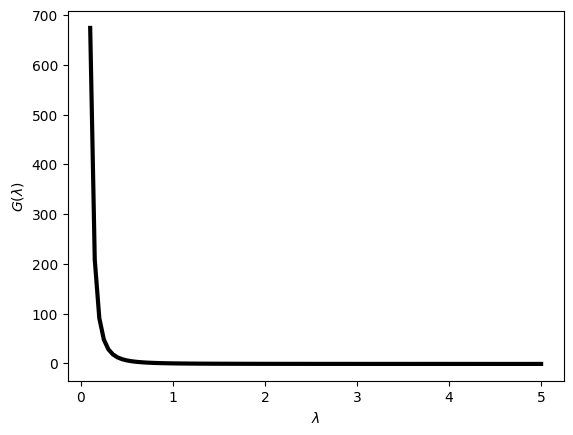

In [35]:
plt.plot(lambdaArr,G,'k-',linewidth=3)
plt.xlabel("$\lambda$")
plt.ylabel("$G(\lambda)$")

In [36]:
#search for root of G(\lambda) between leftBracket and rightBracket
leftBracket=0.001
rightBracket=5

#The first argument of euLot (lam) is the variable we want to solve with respect to.  
#The next arguments are parameters, which we pass like this:
args=(IArr,fArr)

opt.brentq(euLot,leftBracket,rightBracket,args)

1.0472757407711637

**BREAKOUT EXERCISE:**  
* Modify the values of $p_j$ (and hence $I_j$) and/or $f_j$ so that the root changes to 1.0.  Explain why this worked, intuitively.
* Then, try again, this time to get this to give a root of 0, 0.5, or 2.0.

## The Leslie Matrix and matrix model iteration

Now define the equivalent Leslie Matrix, returning to our first case of:
* A=2
* p0=0.5, p1=0.25
* f0=0, f1=1, f2=5

In [37]:
nZero=np.array([20,240,60])

A=np.array([[0 ,1,5],[.5 ,0 ,0],[0 , .25 , 0]])
print(A)

[[0.   1.   5.  ]
 [0.5  0.   0.  ]
 [0.   0.25 0.  ]]


In [38]:
Tmax=200

nT=np.zeros([3,Tmax])

nT[:,0]=nZero 


#Print out our quanties so far, check that they make sense
print(nT[:,0])
print(A)
# the following are three ways to do matrix/matrix multiplication in numpy:
# np.dot(A,nT[:,0])
# A@nT[:,0]
np.matmul(A,nT[:,0])


[ 20. 240.  60.]
[[0.   1.   5.  ]
 [0.5  0.   0.  ]
 [0.   0.25 0.  ]]


array([540.,  10.,  60.])

Iterate dynamical model:

In [39]:
for t in range(Tmax-1):
    nT[:,t+1]=np.dot(A,nT[:,t])

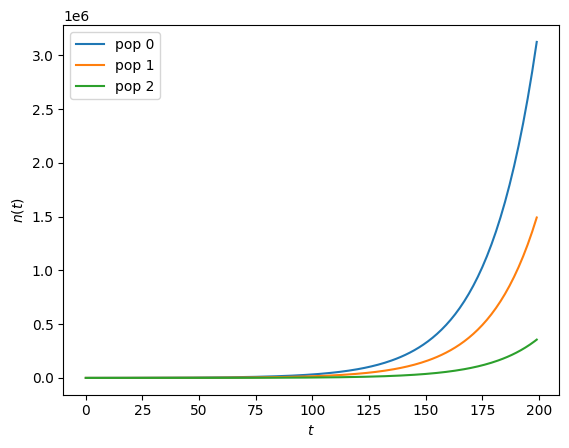

In [40]:
generations=np.arange(Tmax)
plt.plot(generations,nT[0,:],label="pop 0")
plt.plot(generations,nT[1,:],label="pop 1")
plt.plot(generations,nT[2,:],label="pop 2")
plt.ylabel('$n(t)$')
plt.xlabel('$t$')
plt.legend()

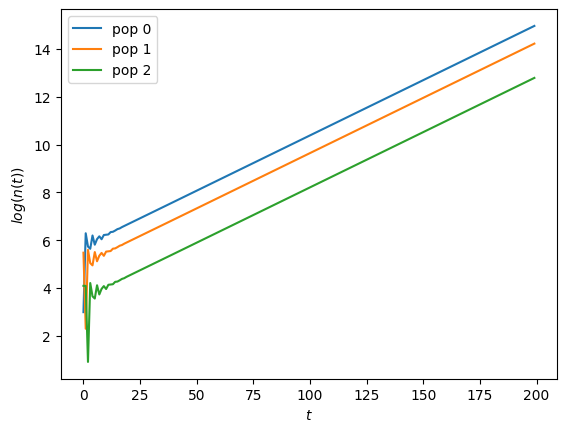

In [41]:
plt.plot(generations,np.log(nT[0,:]),label="pop 0")
plt.plot(generations,np.log(nT[1,:]),label="pop 1")
plt.plot(generations,np.log(nT[2,:]),label="pop 2")
plt.xlabel('$t$')
plt.ylabel('$log(n(t))$')
plt.legend()

In [42]:
help(np.polyfit)

Help on _ArrayFunctionDispatcher in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y 

In [43]:
p=np.polyfit(generations,np.log(nT[0,:]),1)
lambdaEst=np.exp(p[0])

In [44]:
np.set_printoptions(precision=3, suppress=True)
print(p)
print(lambdaEst)

[0.047 5.712]
1.0476748940339515


Redo, cutting off the first squiggles: $t > 25$ or so.

In [45]:
generationAfterSquiggles=np.arange(25,Tmax)

pNew=np.polyfit(generationAfterSquiggles,np.log(nT[0,generationAfterSquiggles]),1)
lambdaEstNew=np.exp(pNew[0])

print(pNew)
print(lambdaEstNew)

[0.046 5.762]
1.04727571605906


Note match to what we found from the Euler-Lotka formula!

**BREAKOUT EXERCISE:**  
* Modify the values of $p_j$ (and hence $I_j$) and/or $f_j$ as in one of the cases for the Euler Lotka formula above, where you got a root of (1, 0.5, or 2).
* Modify the corresponding A matrix,  run the matrix iteration again, and check that you got a growth rate to match.

## Eigenvalues and eigenvectors of the Leslie Matrix

In [46]:
l,v=la.eig(A)
print(l)
print(v)

[ 1.047+0.j    -0.524+0.568j -0.524-0.568j]
[[ 0.898+0.j    -0.827+0.j    -0.827-0.j   ]
 [ 0.429+0.j     0.363+0.393j  0.363-0.393j]
 [ 0.102+0.j     0.014-0.173j  0.014+0.173j]]


#### Sort, in order from smallest to largest abs value of eigenvalue

In [47]:
# sorted eigenvalues and eigenvectors
idx=np.argsort(np.abs(l))
print(np.abs(l))
print(idx)

[1.047 0.773 0.773]
[1 2 0]


In [48]:
# sorted eigenvalues and eigenvectors
idx=np.argsort(np.abs(l))
lSorted=l[idx]  
vSorted=v[:,idx]   #rearrange eigenvectors in same order

#return largest eigenvalue
lambdaMax= lSorted[-1] # index at -1 = last value of array
print(lambdaMax)

(1.0472757407711644+0j)


**Agreement once again!**

#### Return the stable stage distribution:  the eigenvector corresponding to the largest eigenvalue

In [49]:
stableStage=vSorted[:,-1]
print(stableStage)

[0.898+0.j 0.429+0.j 0.102+0.j]
